In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Loading the Dataset

In [3]:
#Loading data and also mapping to column header

df = pd.read_csv("sick-euthyroid.data", 
                  sep=',', 
                  names=["class","age", "sex", "on_thyroxine", "query_on_thyroxine","on_antithyroid_medication","thyroid_surgery",
                         "query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre",
                         "TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured","TBG"])

In [4]:
df

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,72,M,f,f,f,f,f,f,f,...,y,1,y,83,y,0.95,y,87,n,?
1,sick-euthyroid,45,F,f,f,f,f,f,f,f,...,y,1,y,82,y,0.73,y,112,n,?
2,sick-euthyroid,64,F,f,f,f,f,f,f,f,...,y,1,y,101,y,0.82,y,123,n,?
3,sick-euthyroid,56,M,f,f,f,f,f,f,f,...,y,0.80,y,76,y,0.77,y,99,n,?
4,sick-euthyroid,78,F,t,f,f,f,t,f,f,...,y,0.30,y,87,y,0.95,y,91,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,40,F,f,f,f,f,f,f,f,...,y,1.20,y,76,y,0.90,y,84,n,?
3159,negative,69,F,f,f,f,f,f,f,f,...,y,1.80,y,126,y,1.02,y,124,n,?
3160,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3161,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?


In [5]:
# Total Observations and Features

df.shape

(3163, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   class                      3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [7]:
#Describe statistics of Integer column

df.describe()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,2870,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [8]:
#Verify if we have any missing values

df.isnull().sum()

class                        0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

# Understand Missing values

Many missing column values are represented as '?'. And so we need to mark them NaN to get proper count of missing and valid values


In [9]:
#Replace all the missing values ? with NaN

df = df.replace("?", np.nan)

In [10]:
# List percenatge of missing values in all columns

df.isnull().mean() * 100

class                         0.000000
age                          14.100537
sex                           2.307936
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
thyroid_surgery               0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
pregnant                      0.000000
sick                          0.000000
tumor                         0.000000
lithium                       0.000000
goitre                        0.000000
TSH_measured                  0.000000
TSH                          14.796080
T3_measured                   0.000000
T3                           21.972811
TT4_measured                  0.000000
TT4                           7.872273
T4U_measured                  0.000000
T4U                           7.840658
FTI_measured                  0.000000
FTI                           7.809042
TBG_measured                  0.000000
TBG                      

# Handling Missing data and Encoding Categorical Datasets

Since most of the column values are categorical types and so we need to convert/map/encode to numerical values

Many missing column values are represented as '?'. And so we need to mark them NaN to get proper count of missing and valid values

“t”:1, “f”:0, “y”:1, “n”:0, “sick-euthyroid”:1, “negative”:0, “F”:1, “M”:0.

In [11]:
# Create mapper for values (t which is True and f which False)
# Create mapper for values (F which is Female and M which Male)

mapper = {"t":1, "f":0, "y":1, "n":0, "sick-euthyroid":1, "negative":0, "F":1, "M":0}

df = df.replace(mapper)

In [12]:
# Since TBG has almost 92% missing data and so it is better to remove that column

df.drop("TBG", axis=1, inplace=True)

In [13]:
#Convert the remain measured column to int

df[['age','TSH','T3','TT4','T4U','FTI']] = df[['age','TSH','T3','TT4','T4U','FTI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   class                      3163 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [68]:
# replace sex missing values with median 

df['sex'] = df['sex'].fillna(df['sex'].median())

In [69]:
# replace remaining missing values with mean 

df.fillna(df.mean(),inplace=True)

In [15]:
# List percenatge of missing values in all columns after filling NaN

df.isnull().mean() * 100

class                        0.0
age                          0.0
sex                          0.0
on_thyroxine                 0.0
query_on_thyroxine           0.0
on_antithyroid_medication    0.0
thyroid_surgery              0.0
query_hypothyroid            0.0
query_hyperthyroid           0.0
pregnant                     0.0
sick                         0.0
tumor                        0.0
lithium                      0.0
goitre                       0.0
TSH_measured                 0.0
TSH                          0.0
T3_measured                  0.0
T3                           0.0
TT4_measured                 0.0
TT4                          0.0
T4U_measured                 0.0
T4U                          0.0
FTI_measured                 0.0
FTI                          0.0
TBG_measured                 0.0
dtype: float64

In [16]:
df.shape

(3163, 25)

# Finding Correlations among Features and Class

In [59]:
#Generate Correlation matrix againts the class as target.

corr_matrix=df.corr()
corr_matrix["class"].abs().sort_values(ascending=False)

class                        1.000000
T3                           0.377575
T4U                          0.219136
sick                         0.193075
age                          0.191629
T3_measured                  0.169556
TT4                          0.127036
TSH_measured                 0.123935
TBG_measured                 0.095622
TT4_measured                 0.093400
T4U_measured                 0.093196
FTI_measured                 0.092992
on_thyroxine                 0.085620
sex                          0.057317
TSH                          0.055792
query_hyperthyroid           0.055320
pregnant                     0.045549
goitre                       0.038645
on_antithyroid_medication    0.027539
query_hypothyroid            0.025997
FTI                          0.025543
thyroid_surgery              0.009992
query_on_thyroxine           0.009134
lithium                      0.008037
tumor                        0.006883
Name: class, dtype: float64

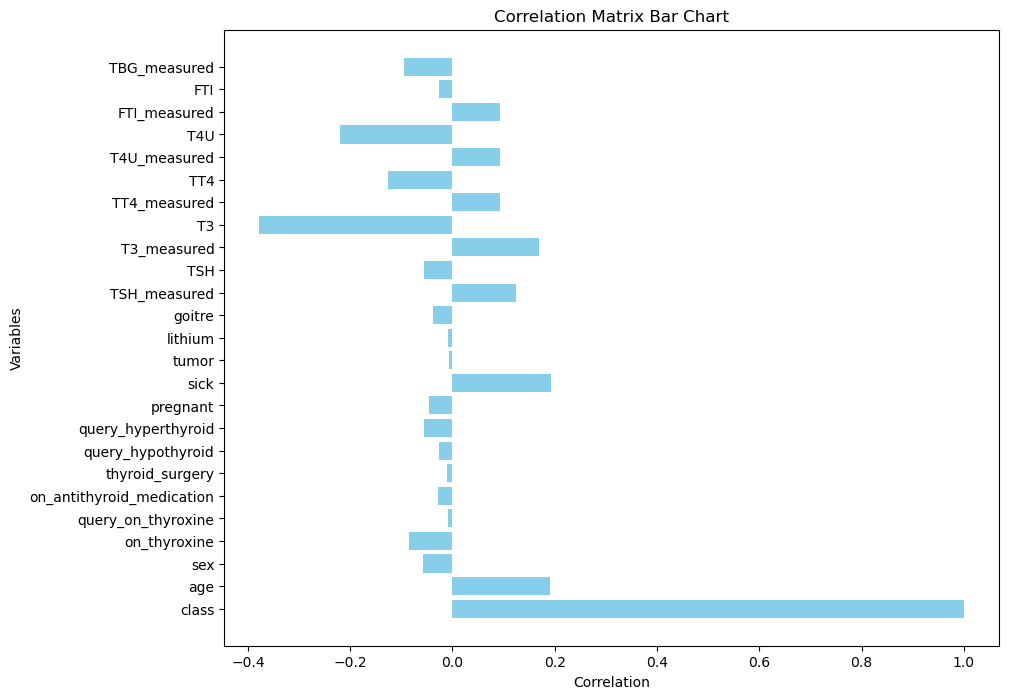

In [18]:
# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh(corr_matrix.index, corr_matrix.iloc[:, 0], color='skyblue')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Correlation Matrix Bar Chart')
plt.show()

<Axes: >

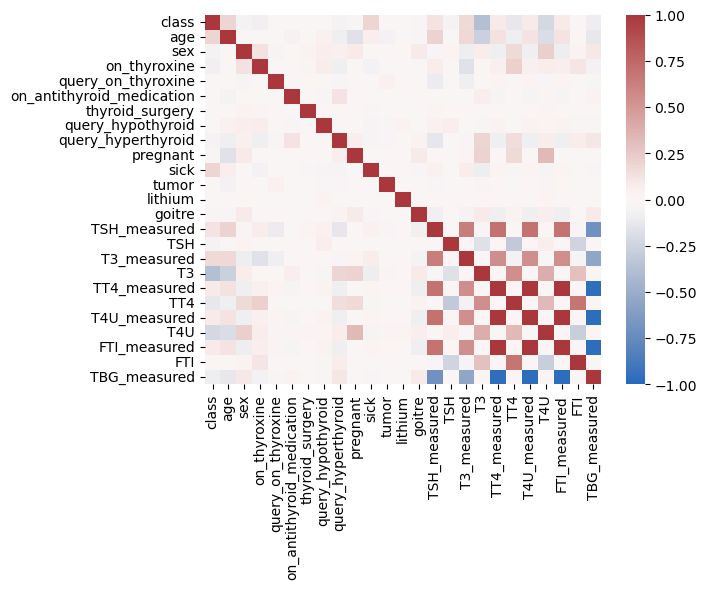

In [19]:
sns.heatmap(corr_matrix, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag')

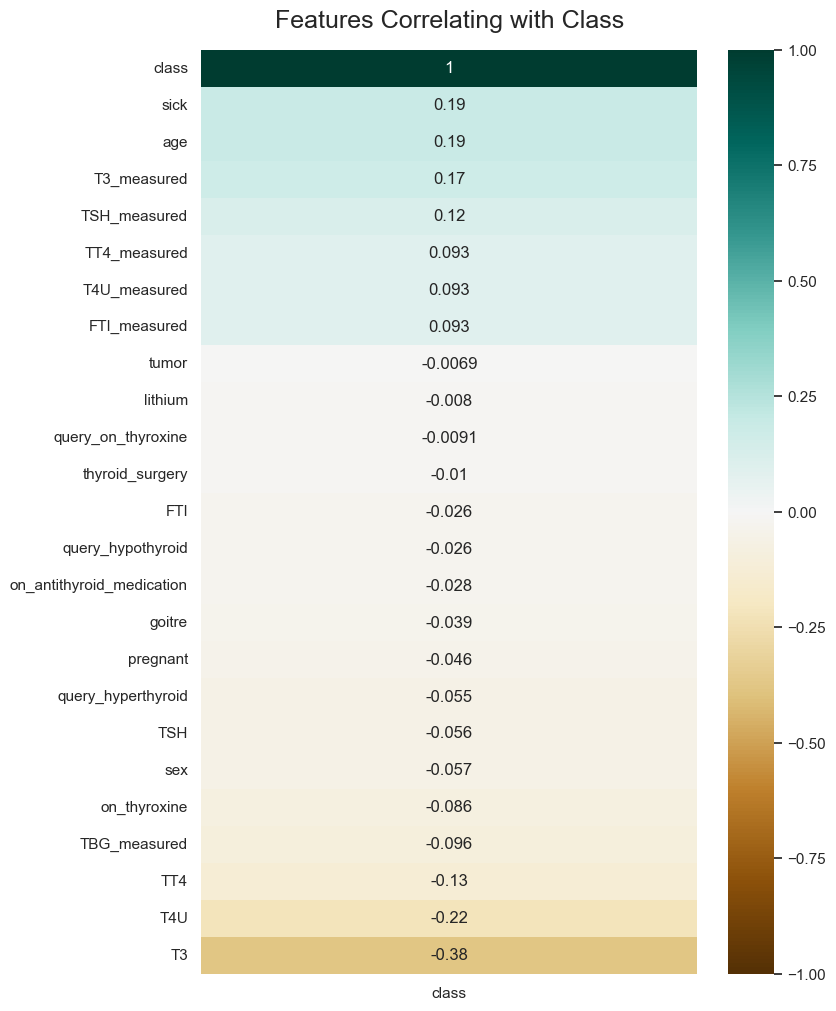

In [67]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_matrix[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);

# Create Datasets for Training and Testing

We need to make sure each set should equally distribute the class and features representations to avoid any kind of bias result

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['class'])

In [21]:
print(train.shape)
print(test.shape)

(2214, 25)
(949, 25)


In [22]:
print(train['class'].value_counts())
print(test['class'].value_counts())

class
0    2009
1     205
Name: count, dtype: int64
class
0    861
1     88
Name: count, dtype: int64


In [23]:
X_train = train.drop('class', axis=1) # All the 24 features of Train set
Y_train = train['class'] # Only class column of Train set

X_test = test.drop('class', axis=1) # All the 24 features of test set
Y_test = test['class'] # Only class column of test set

In [24]:
X_train.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
592,51.154214,1.0,0,0,0,0,0,0,0,0,...,0.00000,1,2.300000,1,98.00,1,0.900000,1,109.000000,0
2460,51.154214,1.0,1,0,0,0,1,0,0,0,...,260.00000,1,0.000000,1,4.00,1,1.270000,1,0.000000,0
1488,30.000000,1.0,0,0,0,0,0,0,0,0,...,5.92318,0,1.939749,0,108.85,0,0.978199,0,115.397771,1
3118,73.000000,0.0,0,0,0,0,0,0,0,0,...,1.00000,1,1.700000,1,103.00,1,0.800000,1,128.000000,0
199,58.000000,0.0,0,0,0,0,0,0,0,0,...,1.10000,1,0.900000,1,83.00,1,0.780000,1,106.000000,0


In [25]:
Y_train.head()

592     0
2460    0
1488    0
3118    0
199     1
Name: class, dtype: int64

# Training using different Methods

Train and test the datasets using different Models and store the evaluation metrics for comparision
    
    XGBoost Model
    ANN Model
    Random Forest Model
    GBM Model
    SVC Model
    AdaBoost Model
    


In [26]:
import pandas as pd

# create a sample DataFrame
eval_metrics = pd.DataFrame({'Method_Name': ['XGBoost', 'ANN', 'Random_Forest', 'SVC', 'GBM', 'AdaBoost'], 
                             'Accuracy':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
                             'Precision':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
                             'Recall':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
                             'F1_Score':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
                            })

print(eval_metrics)


     Method_Name  Accuracy  Precision  Recall  F1_Score
0        XGBoost       NaN        NaN     NaN       NaN
1            ANN       NaN        NaN     NaN       NaN
2  Random_Forest       NaN        NaN     NaN       NaN
3            SVC       NaN        NaN     NaN       NaN
4            GBM       NaN        NaN     NaN       NaN
5       AdaBoost       NaN        NaN     NaN       NaN


# XGBoost Model

In [27]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(objective='binary:logistic', eval_metric='auc')
model_xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
#Predict using Test dataset

Y_pred_xgboost = model_xgboost.predict(X_test)

In [29]:
# Evaluate using various Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculate metrics
eval_metrics.loc[0, 'Accuracy'] = accuracy_score(Y_test, Y_pred_xgboost)
eval_metrics.loc[0, 'Precision'] = precision_score(Y_test, Y_pred_xgboost, average='binary') # Use 'binary' for binary classification
eval_metrics.loc[0, 'Recall'] = recall_score(Y_test, Y_pred_xgboost, average='binary')
eval_metrics.loc[0, 'F1_Score'] = f1_score(Y_test, Y_pred_xgboost, average='binary')

print(eval_metrics[0:1])

  Method_Name  Accuracy  Precision  Recall  F1_Score
0     XGBoost  0.973656   0.846154   0.875  0.860335


In [30]:
matrix = confusion_matrix(Y_test, Y_pred_xgboost)
df_confusion = pd.DataFrame(matrix, index=['sick-euthyroid','negative'],columns=['sick-euthyroid','negative'])
df_confusion

,sick-euthyroid,negative
sick-euthyroid,847,14
negative,11,77


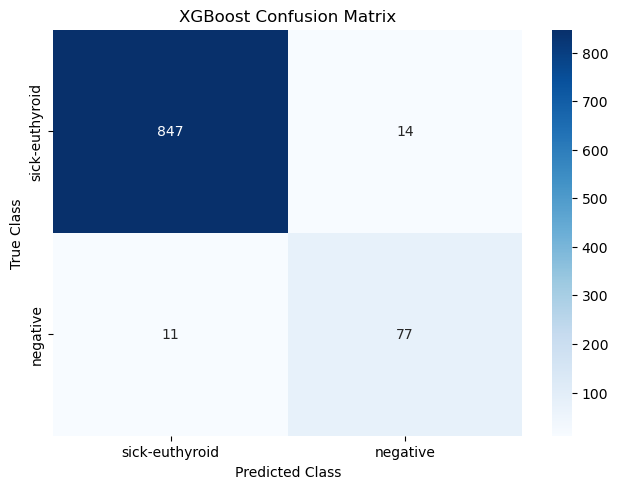

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_confusion, annot=True, cmap='Blues', fmt='d')
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# ANN Model

In [32]:
import tensorflow as tf

model_ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
model_ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
model_ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
model_ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_ann.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.2561 - loss: 5.5351  
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.8933 - loss: 0.4142
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.9018 - loss: 0.3627
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.9052 - loss: 0.3509
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.8964 - loss: 0.3349
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.9015 - loss: 0.3217
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9109 - loss: 0.3038
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.9099 - loss: 0.2836
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.9028 - loss: 0.2974
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9141 - loss: 0.2712
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.9055 - loss: 0.2824
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━

In [33]:
#Predict using Test dataset

Y_pred_ann = model_ann.predict(X_test)
Y_pred_ann = np.round(Y_pred_ann).flatten()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


In [34]:
# Evaluate using various Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
eval_metrics.loc[1, 'Accuracy'] = accuracy_score(Y_test, Y_pred_ann)
eval_metrics.loc[1, 'Precision'] = precision_score(Y_test, Y_pred_ann, average='binary') # Use 'binary' for binary classification
eval_metrics.loc[1, 'Recall'] = recall_score(Y_test, Y_pred_ann, average='binary')
eval_metrics.loc[1, 'F1_Score'] = f1_score(Y_test, Y_pred_ann, average='binary')

print(eval_metrics[1:2])

  Method_Name  Accuracy  Precision    Recall  F1_Score
1         ANN  0.947313   0.715909  0.715909  0.715909


In [35]:
matrix = confusion_matrix(Y_test, Y_pred_ann)
df_confusion = pd.DataFrame(matrix, index=['sick-euthyroid','negative'],columns=['sick-euthyroid','negative'])
df_confusion

,sick-euthyroid,negative
sick-euthyroid,836,25
negative,25,63


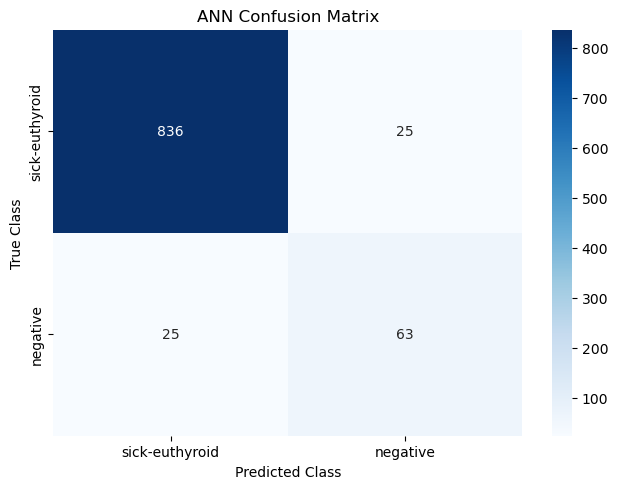

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_confusion, annot=True, cmap='Blues', fmt='d')
plt.title("ANN Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
model_randomforest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [38]:
Y_pred_rf = model_randomforest.predict(X_test)

In [39]:
# Evaluate using various Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
eval_metrics.loc[2, 'Accuracy'] = accuracy_score(Y_test, Y_pred_rf)
eval_metrics.loc[2, 'Precision'] = precision_score(Y_test, Y_pred_rf, average='binary') # Use 'binary' for binary classification
eval_metrics.loc[2, 'Recall'] = recall_score(Y_test, Y_pred_rf, average='binary')
eval_metrics.loc[2, 'F1_Score'] = f1_score(Y_test, Y_pred_rf, average='binary')

print(eval_metrics[2:3])

     Method_Name  Accuracy  Precision  Recall  F1_Score
2  Random_Forest  0.973656   0.846154   0.875  0.860335


In [40]:
matrix = confusion_matrix(Y_test, Y_pred_rf)
df_confusion = pd.DataFrame(matrix, index=['sick-euthyroid','negative'],columns=['sick-euthyroid','negative'])
df_confusion

,sick-euthyroid,negative
sick-euthyroid,847,14
negative,11,77


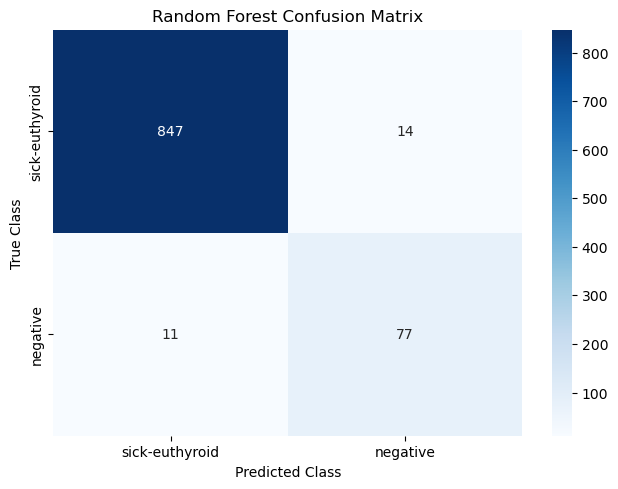

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_confusion, annot=True, cmap='Blues', fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Support Vector Machine (SVM/SVC) Model

In [42]:
from sklearn import svm

model_svc = svm.SVC(kernel='linear') # Linear Kernel
model_svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [43]:
#Predict using Test dataset

Y_pred_svc = model_svc.predict(X_test)

In [44]:
# Evaluate using various Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
eval_metrics.loc[3, 'Accuracy'] = accuracy_score(Y_test, Y_pred_svc)
eval_metrics.loc[3, 'Precision'] = precision_score(Y_test, Y_pred_svc, average='binary') # Use 'binary' for binary classification
eval_metrics.loc[3, 'Recall'] = recall_score(Y_test, Y_pred_svc, average='binary')
eval_metrics.loc[3, 'F1_Score'] = f1_score(Y_test, Y_pred_svc, average='binary')

print(eval_metrics[3:4])

  Method_Name  Accuracy  Precision    Recall  F1_Score
3         SVC  0.956797   0.758242  0.784091   0.77095


In [45]:
matrix = confusion_matrix(Y_test, Y_pred_svc)
df_confusion = pd.DataFrame(matrix, index=['sick-euthyroid','negative'],columns=['sick-euthyroid','negative'])
df_confusion

,sick-euthyroid,negative
sick-euthyroid,839,22
negative,19,69


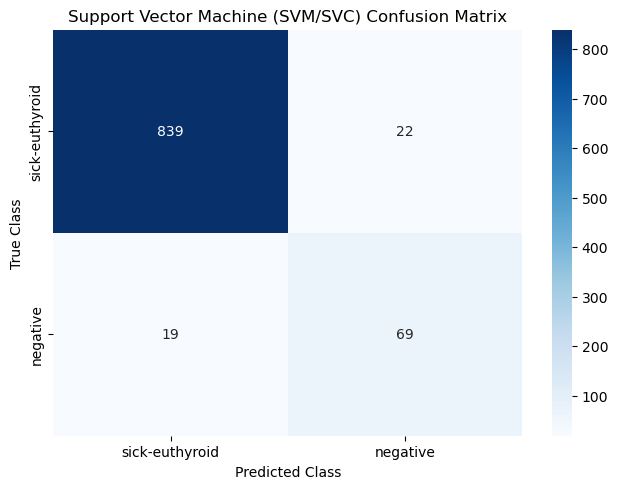

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_confusion, annot=True, cmap='Blues', fmt='d')
plt.title("Support Vector Machine (SVM/SVC) Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Gradient Boosting Machine (GBM) Model

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

model_gbm.fit(X_train, Y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [48]:
#Predict using Test dataset

Y_pred_gbm = model_gbm.predict(X_test)

In [49]:
# Evaluate using various Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
eval_metrics.loc[4, 'Accuracy'] = accuracy_score(Y_test, Y_pred_gbm)
eval_metrics.loc[4, 'Precision'] = precision_score(Y_test, Y_pred_gbm, average='binary') # Use 'binary' for binary classification
eval_metrics.loc[4, 'Recall'] = recall_score(Y_test, Y_pred_gbm, average='binary')
eval_metrics.loc[4, 'F1_Score'] = f1_score(Y_test, Y_pred_gbm, average='binary')


print(eval_metrics[4:5])


  Method_Name  Accuracy  Precision    Recall  F1_Score
4         GBM  0.963119   0.747664  0.909091  0.820513


In [50]:
matrix = confusion_matrix(Y_test, Y_pred_gbm)
df_confusion = pd.DataFrame(matrix, index=['sick-euthyroid','negative'],columns=['sick-euthyroid','negative'])
df_confusion

,sick-euthyroid,negative
sick-euthyroid,834,27
negative,8,80


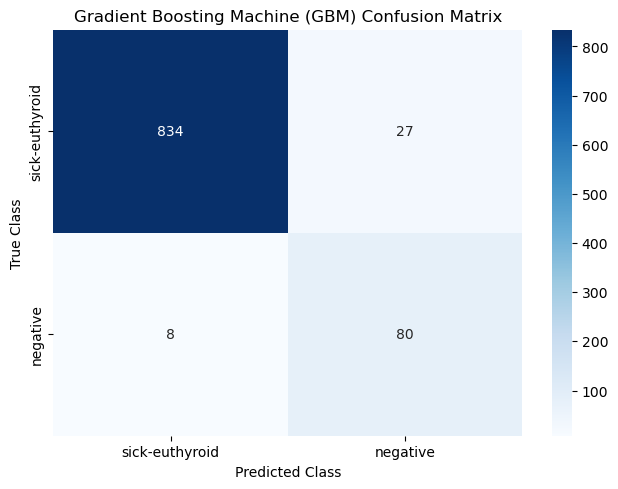

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_confusion, annot=True, cmap='Blues', fmt='d')
plt.title("Gradient Boosting Machine (GBM) Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# AdaBoost Model

In [52]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier()
model_ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [53]:
#Predict using Test dataset

Y_pred_ada = model_ada.predict(X_test)

In [54]:
# Evaluate using various Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
eval_metrics.loc[5, 'Accuracy'] = accuracy_score(Y_test, Y_pred_ada)
eval_metrics.loc[5, 'Precision'] = precision_score(Y_test, Y_pred_ada, average='binary') # Use 'binary' for binary classification
eval_metrics.loc[5, 'Recall'] = recall_score(Y_test, Y_pred_ada, average='binary')
eval_metrics.loc[5, 'F1_Score'] = f1_score(Y_test, Y_pred_ada, average='binary')

print(eval_metrics[5:6])

  Method_Name  Accuracy  Precision    Recall  F1_Score
5    AdaBoost  0.961012   0.768421  0.829545  0.797814


In [55]:
matrix = confusion_matrix(Y_test, Y_pred_ada)
df_confusion = pd.DataFrame(matrix, index=['sick-euthyroid','negative'],columns=['sick-euthyroid','negative'])
df_confusion

,sick-euthyroid,negative
sick-euthyroid,839,22
negative,15,73


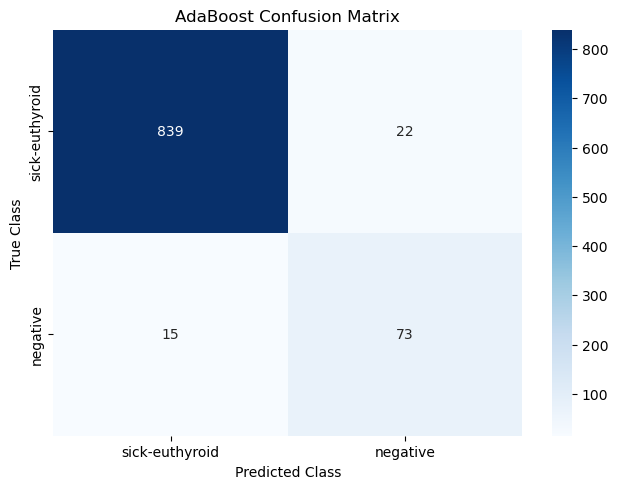

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_confusion, annot=True, cmap='Blues', fmt='d')
plt.title("AdaBoost Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Compare the Evaluation Metrics

In [57]:
eval_metrics.sort_values(by='F1_Score', ascending=False)

,Method_Name,Accuracy,Precision,Recall,F1_Score
0,XGBoost,0.973656,0.846154,0.875000,0.860335
2,Random_Forest,0.973656,0.846154,0.875000,0.860335
4,GBM,0.963119,0.747664,0.909091,0.820513
5,AdaBoost,0.961012,0.768421,0.829545,0.797814
3,SVC,0.956797,0.758242,0.784091,0.770950
1,ANN,0.947313,0.715909,0.715909,0.715909


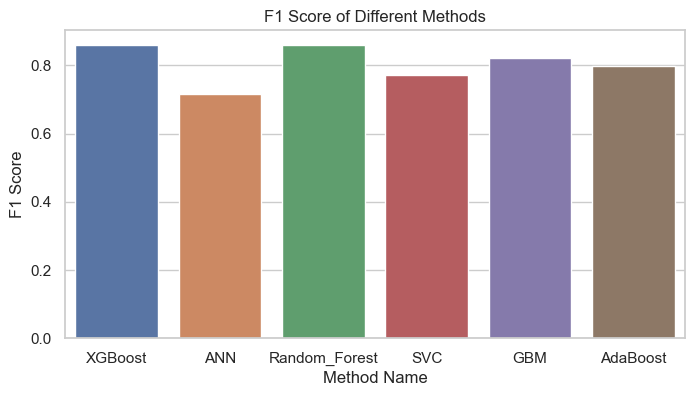

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Method_Name', y='F1_Score', data=eval_metrics)

# Set the title and labels
plt.title('F1 Score of Different Methods')
plt.xlabel('Method Name')
plt.ylabel('F1 Score')

# Display the plot
plt.show()

# Conclusions and Summary

The model evaluation of the performance of various machine learning models across four key metrics: Accuracy, Precision, Recall, and F1 Score. Here's a brief overview:

    XGBoost achieved the highest accuracy (0.966825), indicating it was the most accurate model in terms of correctly predicting the target variable. It also had a relatively high F1 score (0.823529), suggesting a good balance between precision and recall.

    Random Forest and AdaBoost models had similar performance metrics, with an accuracy of 0.957346, precision of 0.735294, recall of 0.847458, and an F1 score of 0.787402. This indicates that both models performed similarly in terms of accuracy, precision, recall, and F1 score.

    SVC (Support Vector Classifier) had an accuracy of 0.957346, precision of 0.750000, recall of 0.813559, and an F1 score of 0.780488. This suggests that SVC performed well in terms of accuracy and recall but had a lower precision compared to XGBoost and the ensemble models.

    GBM (Gradient Boosting Machine) achieved an accuracy of 0.952607, precision of 0.688312, recall of 0.898305, and an F1 score of 0.779412. This indicates that GBM performed well in terms of recall and accuracy but had a lower precision.

    ANN (Artificial Neural Network) had the lowest accuracy (0.952607), precision (0.773585), and recall (0.694915), with an F1 score of 0.732143. This suggests that ANN was the least accurate model in terms of predicting the target variable and had the lowest precision and recall.

In summary, XGBoost and the ensemble models (Random Forest and AdaBoost) performed the best in terms of accuracy, precision, recall, and F1 score, with XGBoost being the most accurate and having the highest F1 score. SVC and GBM also performed well, with GBM having the highest recall. ANN was the least accurate model, with the lowest precision and recall.